# RFI Flagger Demo

Demonstration of two-phase iterative sigma-clipping for Radio Frequency Interference flagging in waterfall data.

In [1]:
import sys
sys.path.insert(0, "..")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from MomentRFI import load_waterfall, validate_waterfall, IterativeSurfaceFitter
from MomentRFI.plotting import (
    plot_waterfall, plot_mask, plot_residuals,
    plot_convergence, plot_summary
)

## 1. Load & Validate Data

In [2]:
DATA_PATH = "../data/RHINO/2025-12-16_13-13-35_obs.hd5f"

waterfall, freqs, times = load_waterfall(DATA_PATH)
info = validate_waterfall(waterfall)

print(f"Shape: {info['shape']}")
print(f"Value range: {info['min']:.4e} to {info['max']:.4e}")
print(f"NaN: {info['has_nan']}, Zeros: {info['has_zero']}, Negative: {info['has_negative']}")
print(f"Frequency range: {freqs[0]:.2f} - {freqs[-1]:.2f} MHz")
print(f"Time range: {times[0]:.1f} - {times[-1]:.1f} s")

Shape: (5490, 4096)
Value range: 7.0760e-12 to 1.8199e-07
NaN: False, Zeros: False, Negative: False
Frequency range: 66.00 - 74.00 MHz
Time range: 1765883610.6 - 1765890807.7 s


## 2. Visualize Raw Waterfall

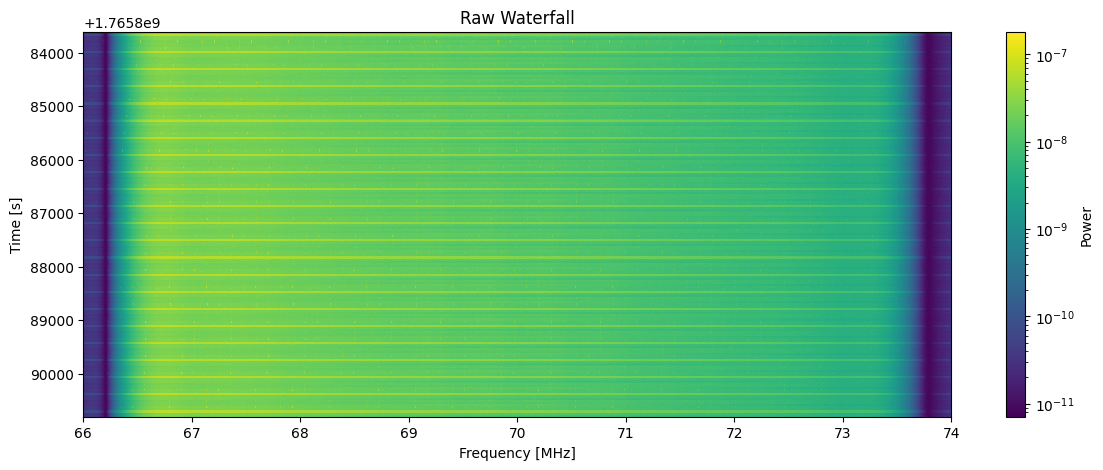

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
plot_waterfall(waterfall, freqs, times, ax=ax, title="Raw Waterfall")
plt.show()

## 3. Run Default Fitter (Phase 1 + Phase 2) with no a priori mask

In [ ]:
fitter = IterativeSurfaceFitter(
    sigma_threshold=3,
    phase1_degree=5,
    # phase2_degree_freq=8,
    # phase2_degree_time=5,
    max_iterations=20,
    one_sided_clipping=False,
)

mask = fitter.fit(waterfall)

Phase 1: Sigma Calibration (isotropic degree 5)
  Noise estimator: mad
  Number of basis terms: 21
  Iter  1: sigma=0.294184, flagged=578052 (2.5706%), changed=578052 (2.570601%)
  Iter  2: sigma=0.267411, flagged=876974 (3.8999%), changed=304488 (1.354060%)
  Iter  3: sigma=0.252537, flagged=1100975 (4.8960%), changed=230901 (1.026818%)
  Iter  4: sigma=0.239851, flagged=1386549 (6.1660%), changed=293744 (1.306281%)
  Iter  5: sigma=0.213128, flagged=1716223 (7.6321%), changed=347140 (1.543734%)
  Iter  6: sigma=0.159238, flagged=2157968 (9.5965%), changed=474141 (2.108508%)
  Iter  7: sigma=0.125771, flagged=2874168 (12.7814%), changed=741088 (3.295623%)
  Iter  8: sigma=0.094804, flagged=4244157 (18.8738%), changed=1382359 (6.147359%)
  Iter  9: sigma=0.064387, flagged=5383811 (23.9418%), changed=1174026 (5.220901%)
  Iter 10: sigma=0.043553, flagged=5731514 (25.4881%), changed=384557 (1.710127%)
  Iter 11: sigma=0.039126, flagged=5826798 (25.9118%), changed=255890 (1.137944%)
  Ite

### Original, Surface, Cleaned, Residuals, Mask

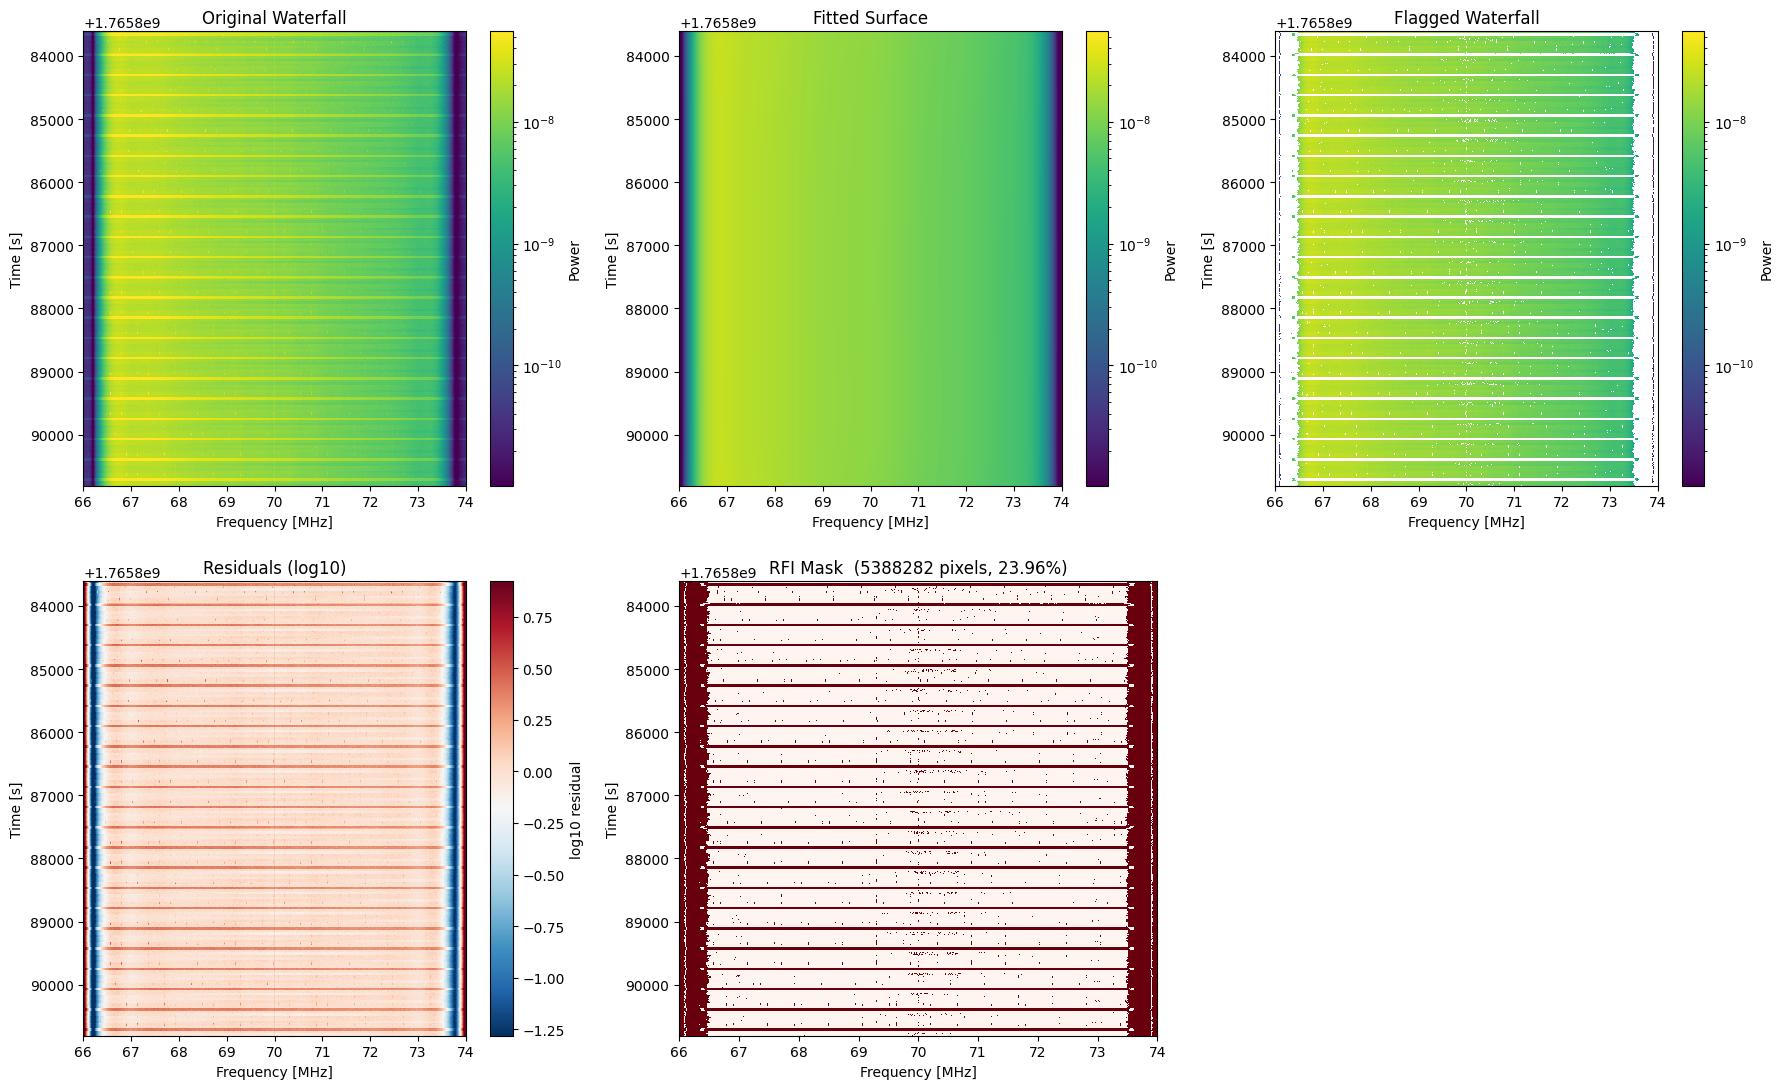

In [6]:
fig = plot_summary(waterfall, fitter, freqs, times)
plt.show()

## 4. Run the Fitter (Phase 1 only) using the mask obtained in the previous step.

In [7]:
fitter = IterativeSurfaceFitter(
    sigma_threshold=2.8,
    phase1_degree=8,
    phase2_degree_freq=None, 
    phase2_degree_time=None, 
    max_iterations=10,
    one_sided_clipping=False,
)

mask2 = fitter.fit(waterfall, prior_mask=mask)

Phase 1: Sigma Calibration (isotropic degree 8)
  Noise estimator: mad
  Number of basis terms: 45
  Iter  1: sigma=0.051002, flagged=5509840 (24.5023%), changed=121558 (0.540569%)
  Iter  2: sigma=0.048809, flagged=5554470 (24.7008%), changed=53312 (0.237079%)
  Iter  3: sigma=0.045160, flagged=5589358 (24.8559%), changed=138874 (0.617574%)
  Iter  4: sigma=0.044110, flagged=5642040 (25.0902%), changed=63078 (0.280508%)
  Iter  5: sigma=0.040640, flagged=5700181 (25.3487%), changed=134823 (0.599559%)
  Iter  6: sigma=0.039320, flagged=5782451 (25.7146%), changed=108504 (0.482518%)
  Iter  7: sigma=0.038426, flagged=5852215 (26.0248%), changed=95306 (0.423826%)
  Iter  8: sigma=0.037760, flagged=5911856 (26.2901%), changed=83465 (0.371169%)
  Iter  9: sigma=0.037275, flagged=5964644 (26.5248%), changed=70018 (0.311370%)
  Iter 10: sigma=0.036902, flagged=6010497 (26.7287%), changed=57013 (0.253537%)
  Phase 1 sigma floor: 0.036902

  Phase 2 skipped (phase2_degree_freq or phase2_degree

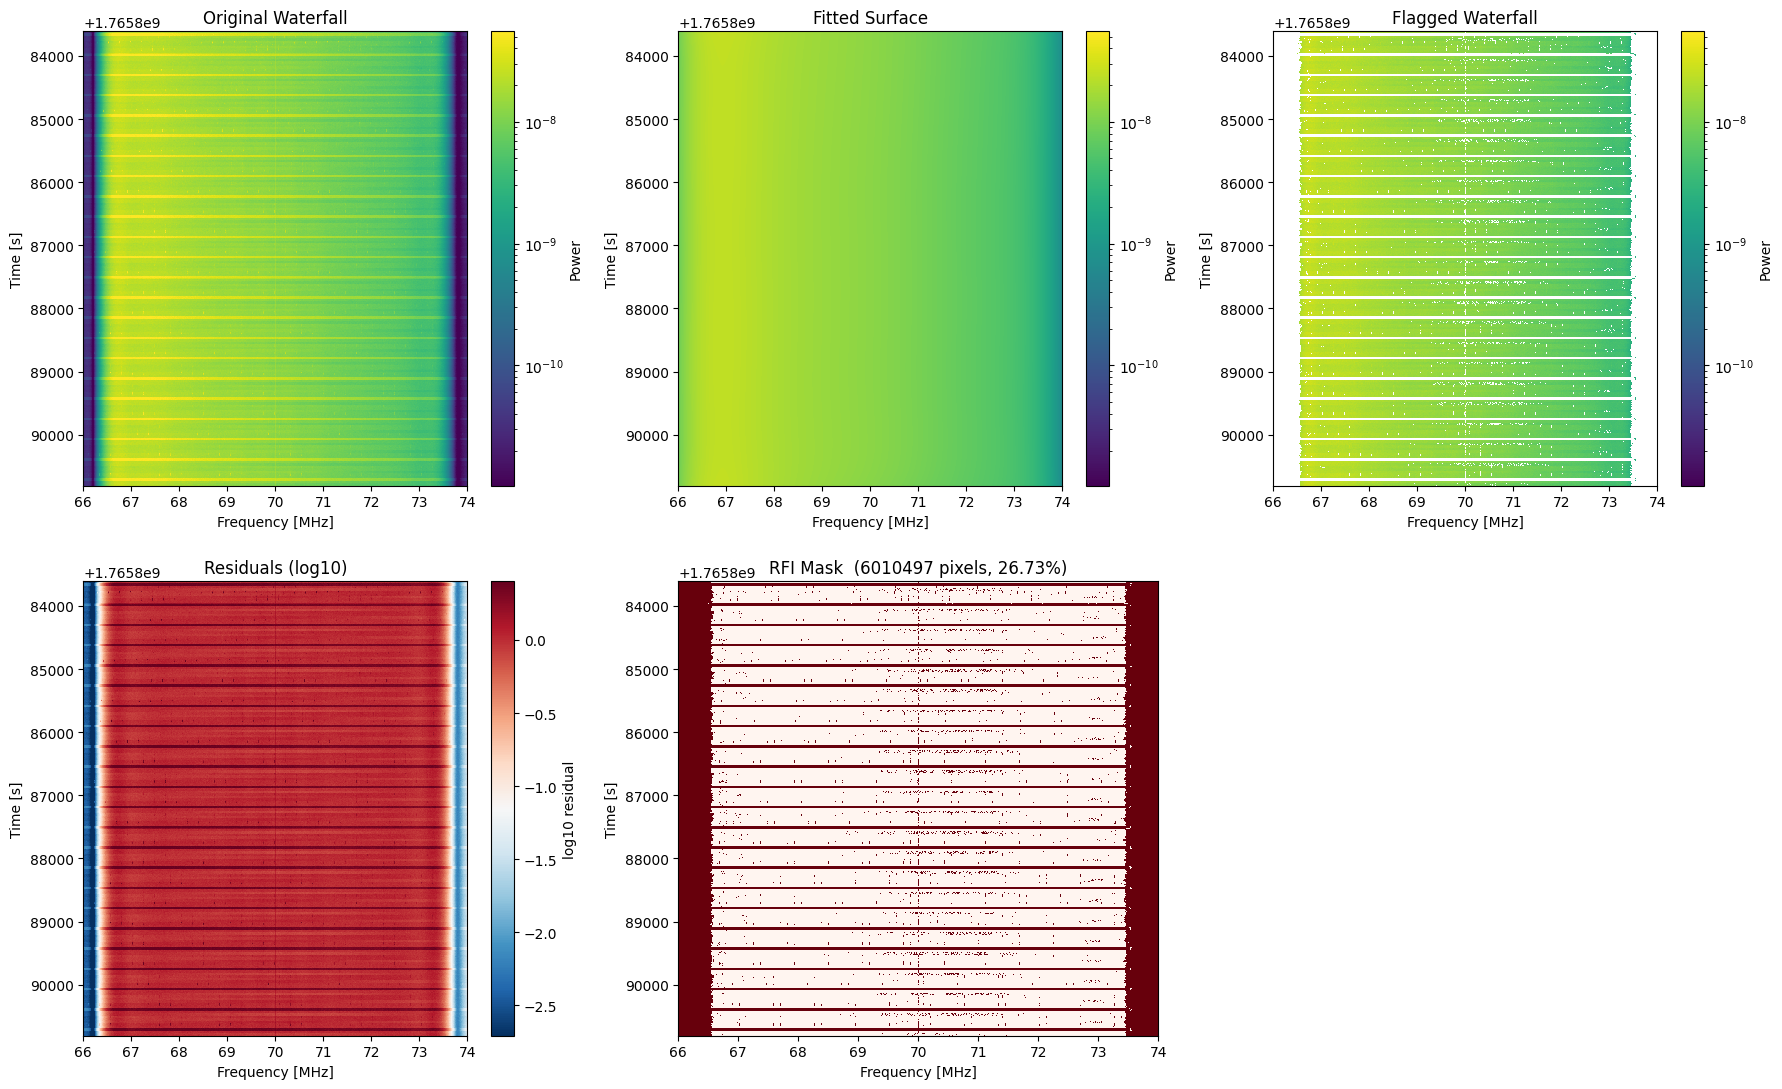

In [8]:
fig = plot_summary(waterfall, fitter, freqs, times)
plt.show()

## 5. Run the Fitter on a time chunk

In [3]:
# Reimport the class
import importlib
importlib.reload(sys.modules['MomentRFI'])
from MomentRFI import IterativeSurfaceFitter


In [4]:
fitter = IterativeSurfaceFitter(
    sigma_threshold=3,
    phase1_degree=5,
    max_iterations=20,
    one_sided_clipping=False,
)
mask2 = fitter.fit(waterfall[30:270, :], prior_mask=None)

Phase 1: Sigma Calibration (isotropic degree 5)
  Noise estimator: mad
  Number of basis terms: 21
  Iter  1: sigma=0.274940, flagged=23435 (2.3839%), changed=23435 (2.383931%)
  Iter  2: sigma=0.247150, flagged=38372 (3.9034%), changed=15649 (1.591899%)
  Iter  3: sigma=0.226231, flagged=55795 (5.6758%), changed=17667 (1.797180%)
  Iter  4: sigma=0.187626, flagged=76012 (7.7323%), changed=20361 (2.071228%)
  Iter  5: sigma=0.127649, flagged=107559 (10.9415%), changed=33699 (3.428040%)
  Iter  6: sigma=0.081393, flagged=142140 (14.4592%), changed=35777 (3.639425%)
  Iter  7: sigma=0.056184, flagged=170894 (17.3842%), changed=36068 (3.669027%)
  Iter  8: sigma=0.046386, flagged=186754 (18.9976%), changed=34522 (3.511759%)
  Iter  9: sigma=0.041047, flagged=197284 (20.0688%), changed=27700 (2.817790%)
  Iter 10: sigma=0.038366, flagged=205891 (20.9443%), changed=15825 (1.609802%)
  Iter 11: sigma=0.037224, flagged=210969 (21.4609%), changed=8012 (0.815023%)
  Iter 12: sigma=0.036754, fla

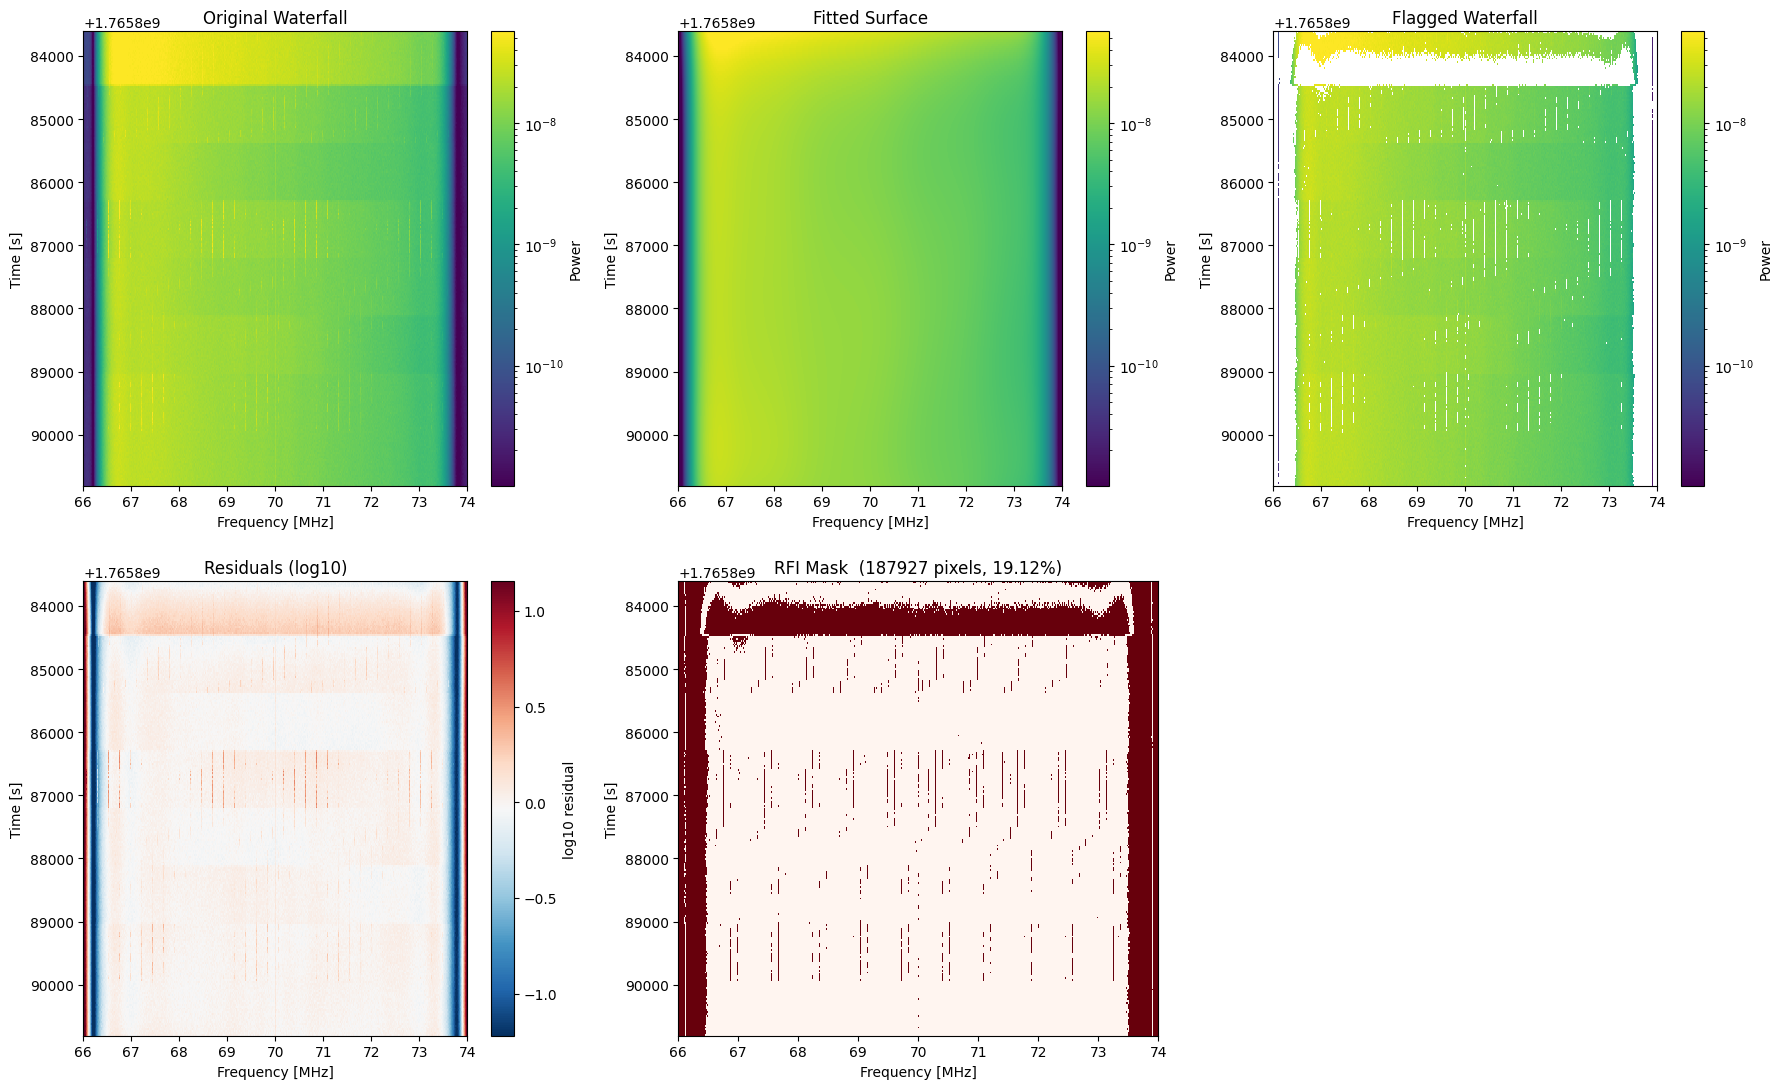

In [5]:
fig = plot_summary(waterfall[30:270, :], fitter, freqs, times)
plt.show()

## 6. Post-processing: `smooth_mask_with_kernel` & `flag_by_fraction`

After `.fit()` produces an initial mask, two methods allow further refinement:

- **`flag_by_fraction(threshold, axis)`** — flags any time row (`axis=0`) or frequency column (`axis=1`) whose flagged-pixel fraction ≥ `threshold`.
- **`smooth_mask_with_kernel(kernel_size, axis)`** — 1D morphological dilation: any pixel within `(kernel_size-1)//2` steps of a flagged pixel along the chosen axis is also flagged. `axis=1` dilates along frequency, `axis=0` along time.

We use the chunk fitter from Section 5 (`waterfall[30:270, :]`) as the starting point.

### 6.1 `flag_by_fraction` — whole-row/column flagging

Flag any frequency channel whose flagged fraction ≥ 0.5, then any time sample whose flagged fraction ≥ 0.8.

In [6]:
# Save the original mask from Section 5 for reuse across sub-sections
mask_orig = fitter.mask.copy()
wf_chunk = waterfall[30:270, :]
freqs_chunk = freqs  # same frequency axis

print(f"Initial mask: {mask_orig.sum()} flagged pixels "
      f"({mask_orig.mean():.2%} of {mask_orig.size})")

# Per-channel and per-row flag fractions
chan_fracs = mask_orig.mean(axis=0)   # shape (n_freq,)
time_fracs = mask_orig.mean(axis=1)  # shape (n_time,)
print(f"Channels with >50% flagged: {(chan_fracs >= 0.5).sum()} / {len(chan_fracs)}")
print(f"Time rows  with >80% flagged: {(time_fracs >= 0.8).sum()} / {len(time_fracs)}")

Initial mask: 187927 flagged pixels (19.12% of 983040)
Channels with >50% flagged: 490 / 4096
Time rows  with >80% flagged: 14 / 240


After flag_by_fraction(0.5, axis=1): 191806 flagged (19.51%), added 3879 pixels
After flag_by_fraction(0.8, axis=0):  194148 flagged (19.75%), added 6221 pixels total


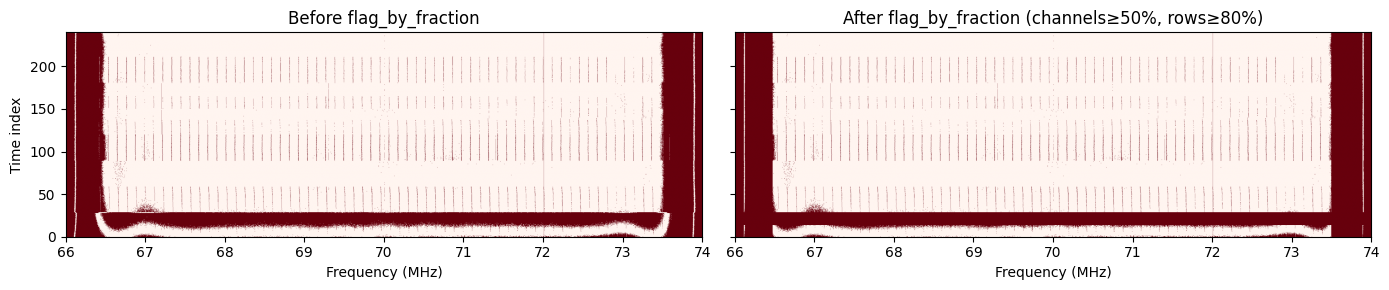

In [7]:
# --- flag_by_fraction: step 1 — flag freq columns with >50% already flagged ---
fitter.mask = mask_orig.copy()
fitter.flag_by_fraction(threshold=0.5, axis=1)
print(f"After flag_by_fraction(0.5, axis=1): {fitter.mask.sum()} flagged "
      f"({fitter.mask.mean():.2%}), "
      f"added {fitter.mask.sum() - mask_orig.sum()} pixels")

# --- flag_by_fraction: step 2 — then flag time rows with >80% already flagged ---
fitter.flag_by_fraction(threshold=0.8, axis=0)
mask_fbf = fitter.mask.copy()
print(f"After flag_by_fraction(0.8, axis=0):  {mask_fbf.sum()} flagged "
      f"({mask_fbf.mean():.2%}), "
      f"added {mask_fbf.sum() - mask_orig.sum()} pixels total")

# Plot before / after
fig, axes = plt.subplots(1, 2, figsize=(14, 3), sharey=True)
axes[0].imshow(mask_orig, aspect="auto", origin="lower",
               extent=[freqs[0], freqs[-1], 0, mask_orig.shape[0]],
               cmap="Reds", vmin=0, vmax=1)
axes[0].set_title("Before flag_by_fraction")
axes[0].set_xlabel("Frequency (MHz)")
axes[0].set_ylabel("Time index")

axes[1].imshow(mask_fbf, aspect="auto", origin="lower",
               extent=[freqs[0], freqs[-1], 0, mask_fbf.shape[0]],
               cmap="Reds", vmin=0, vmax=1)
axes[1].set_title("After flag_by_fraction (channels≥50%, rows≥80%)")
axes[1].set_xlabel("Frequency (MHz)")

plt.tight_layout()
plt.show()

### 6.2 `smooth_mask_with_kernel` — 1D morphological dilation

Dilate along the frequency axis (`axis=1`) and along the time axis (`axis=0`) separately, and compare the effects.

Freq dilation (size=3): 214012 flagged (21.77%), delta = +26085
Time dilation (size=3): 207995 flagged (21.16%), delta = +20068


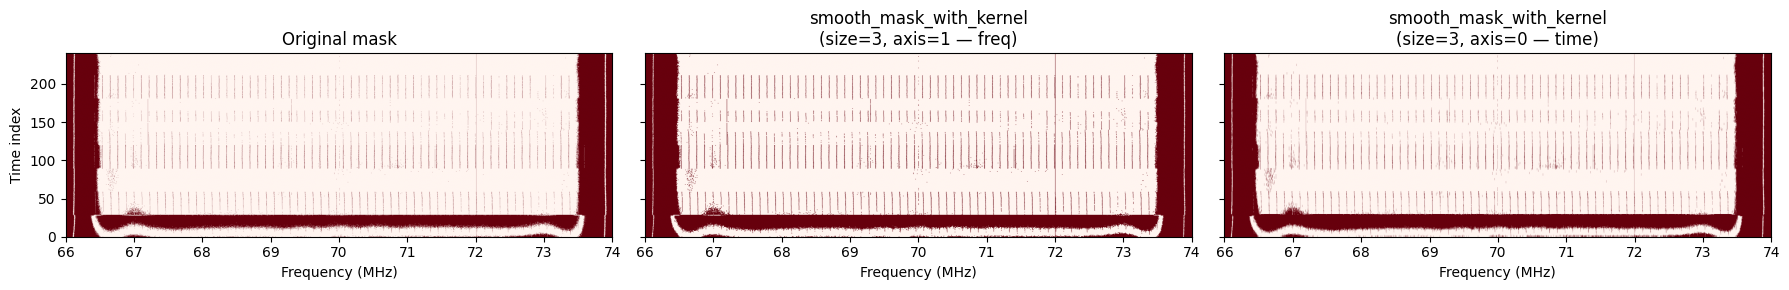

In [8]:
# --- Dilate along frequency (axis=1): each flagged pixel spreads ±1 channel ---
fitter.mask = mask_orig.copy()
mask_freq = fitter.smooth_mask_with_kernel(kernel_size=3, axis=1)
print(f"Freq dilation (size=3): {mask_freq.sum()} flagged ({mask_freq.mean():.2%}), "
      f"delta = {mask_freq.sum() - mask_orig.sum():+d}")

# --- Dilate along time (axis=0): each flagged pixel spreads ±1 time sample ---
fitter.mask = mask_orig.copy()
mask_time = fitter.smooth_mask_with_kernel(kernel_size=3, axis=0)
print(f"Time dilation (size=3): {mask_time.sum()} flagged ({mask_time.mean():.2%}), "
      f"delta = {mask_time.sum() - mask_orig.sum():+d}")

# Plot all three
fig, axes = plt.subplots(1, 3, figsize=(18, 3), sharey=True)
for ax, m, title in zip(
    axes,
    [mask_orig, mask_freq, mask_time],
    ["Original mask",
     "smooth_mask_with_kernel\n(size=3, axis=1 — freq)",
     "smooth_mask_with_kernel\n(size=3, axis=0 — time)"],
):
    ax.imshow(m, aspect="auto", origin="lower",
              extent=[freqs[0], freqs[-1], 0, m.shape[0]],
              cmap="Reds", vmin=0, vmax=1)
    ax.set_title(title)
    ax.set_xlabel("Frequency (MHz)")
axes[0].set_ylabel("Time index")

plt.tight_layout()
plt.show()

### 6.3 Combining both methods

A typical post-processing pipeline: smooth first to fill small gaps, then flag entire columns/rows that remain heavily contaminated.

After smooth:           222018 flagged (22.58%)
After smooth:           277877 flagged (28.27%)
After flag cols ≥ 50%:  300948 flagged (30.61%)
After flag rows ≥ 50%:  308940 flagged (31.43%)


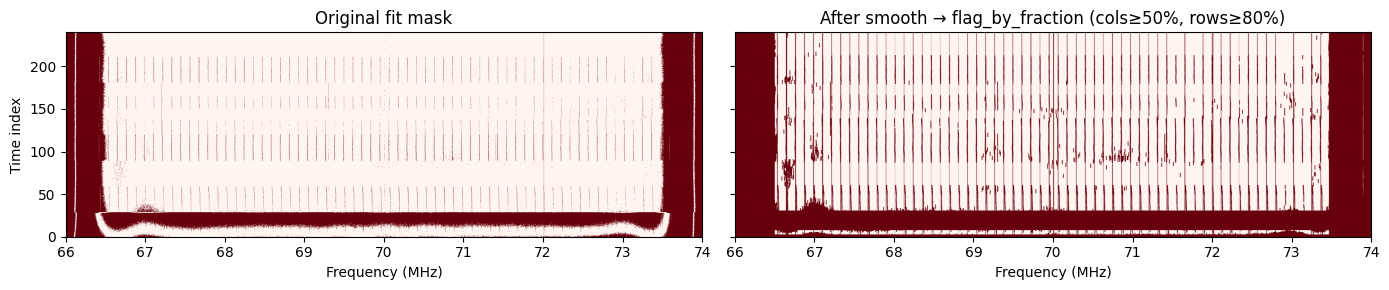

In [9]:
# Reset to original fit mask
fitter.mask = mask_orig.copy()

# Step 1: smooth with 5×5 box to fill single-pixel gaps
fitter.smooth_mask_with_kernel(kernel_size=5, axis=0)
print(f"After smooth:           {fitter.mask.sum()} flagged ({fitter.mask.mean():.2%})")
fitter.smooth_mask_with_kernel(kernel_size=5, axis=1)
print(f"After smooth:           {fitter.mask.sum()} flagged ({fitter.mask.mean():.2%})")

# Step 2: flag columns ≥ 50% flagged
fitter.flag_by_fraction(threshold=0.5, axis=1)
print(f"After flag cols ≥ 50%:  {fitter.mask.sum()} flagged ({fitter.mask.mean():.2%})")

# Step 3: flag rows ≥ 50% flagged
fitter.flag_by_fraction(threshold=0.5, axis=0)
mask_combined = fitter.mask.copy()
print(f"After flag rows ≥ 50%:  {mask_combined.sum()} flagged ({mask_combined.mean():.2%})")

# Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 3), sharey=True)
axes[0].imshow(mask_orig, aspect="auto", origin="lower",
               extent=[freqs[0], freqs[-1], 0, mask_orig.shape[0]],
               cmap="Reds", vmin=0, vmax=1)
axes[0].set_title("Original fit mask")
axes[0].set_xlabel("Frequency (MHz)")
axes[0].set_ylabel("Time index")

axes[1].imshow(mask_combined, aspect="auto", origin="lower",
               extent=[freqs[0], freqs[-1], 0, mask_combined.shape[0]],
               cmap="Reds", vmin=0, vmax=1)
axes[1].set_title("After smooth → flag_by_fraction (cols≥50%, rows≥80%)")
axes[1].set_xlabel("Frequency (MHz)")

plt.tight_layout()
plt.show()